# Harry Potter Species Analysis
In this notebook, we will fetch data from the Harry Potter API and analyze the most common species found in the Harry Potter universe.

We will:
1. Fetch data from the Harry Potter API.
2. Clean the data and handle missing species information by marking them as "Unknown."
3. Visualize the species distribution using a horizontal bar plot.
4. Display the total number of characters in the dataset.


In [5]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Fetch Data from the Harry Potter API
We will now fetch the data from the [Harry Potter API](https://hp-api.onrender.com/api/characters) which provides details about characters from the Harry Potter series.


In [6]:
# Fetch data from the Harry Potter API
url = "https://hp-api.onrender.com/api/characters"
response = requests.get(url)

# If the request is successful, process the data
if response.status_code == 200:
    data = response.json()  # Get data as JSON
    df = pd.DataFrame(data)  # Convert data to DataFrame
else:
    print("Failed to fetch data from the API.")

### Clean the Data
Next, we will clean the data by:
1. Replacing missing species information with "Unknown."
2. Keeping only the `species` column.

In [7]:
# Replace missing 'species' with 'Unknown' instead of removing them
df['species'].fillna('Unknown', inplace=True)

# Keep only 'species' column since 'name' is not needed for the plot
df_cleaned = df[['species']]

C:\Users\sande\AppData\Local\Temp\ipykernel_7672\623532013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['species'].fillna('Unknown', inplace=True)


### Count Species and Plot
Now, let's count how many characters there are in each species and visualize the results using a horizontal bar plot.


C:\Users\sande\AppData\Local\Temp\ipykernel_7672\1734718859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_counts.values, y=species_counts.index, palette='muted', orient='h')


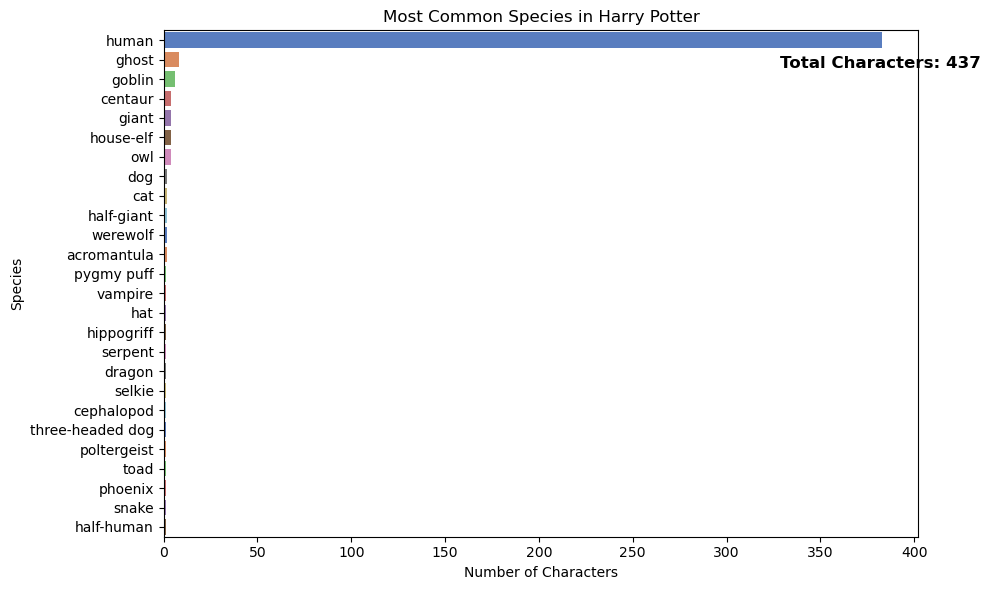

In [8]:
# Create the 'Visuals' folder if it doesn't exist
os.makedirs('Visuals', exist_ok=True)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, palette='muted', orient='h')
plt.title('Most Common Species in Harry Potter')
plt.xlabel('Number of Characters')
plt.ylabel('Species')

# Add text for the total character count on the plot
plt.text(0.95, 0.95, f'Total Characters: {total_characters}', 
         ha='center', va='top', transform=plt.gca().transAxes,
         fontsize=12, color='black', weight='bold')

# Save the plot in 'Visuals' folder
plt.tight_layout()
plt.savefig('Visuals/most_common_species.png')

# Display the plot
plt.show()


### Conclusion
We fetched data from the Harry Potter API, cleaned it by handling missing species, and visualized the most common species among the characters.

The plot was saved in the `Visuals` folder as `most_common_species.png`.
